# Preparing the Dataset

In [21]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
plt.style.use('ggplot')
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [22]:
# Kept the original dataset
listingsNYC = pd.read_csv('listings.csv', dtype=object)
# Dropping all of the columns which we will not use
# listingsNYC= listingsNYC.drop(['last_review','license','latitude','longitude','host_name'], axis=1)

# Dropping all rows with any 'Nan' values in them
# listingsNYC.dropna(axis=0, how='any', inplace=True)
data_types_dict = {
    'price':'int64', 
    'minimum_nights':'int64', 
    'host_id':str,
    'number_of_reviews':'int64',
    'reviews_per_month':float,
    'calculated_host_listings_count':'int64',
    'availability_365':'int64',
    'number_of_reviews_ltm':'int64'}

#changing all the datatype to their respective types that we can work with
listingsNYC = listingsNYC.astype(data_types_dict)

# creating a price per stay (ppn) column with the price and minimim nights columns and rounding to 2 decimal places. 
# This is a float dtype 
listingsNYC['pps'] = (listingsNYC['price'] * listingsNYC['minimum_nights']).round(2)
listingsNYC['neighbourhood'].unique().shape[0]
listingsNYC.describe()
listingsNYC['annual_revenue'] = (365 - listingsNYC['availability_365']) *  listingsNYC['price']
listingsNYC = listingsNYC[(listingsNYC['price'] != 0)]
listingsNYC.loc[:,'log_price']=np.log(listingsNYC['price'])
listingsNYC.loc[:,'log_pps']=np.log(listingsNYC['pps'])
# listingsNYC['price_bin'] = pd.cut(listingsNYC['price'], bins=range(0, 111, 10), right=False, labels=range(0, 110, 10))
df = listingsNYC[(listingsNYC['price']<2000) & (listingsNYC['price']>20) & (listingsNYC['minimum_nights'] < 30)]
df['price_bin'] = pd.cut(df['price'], bins=range(0, 2001, 20), right=False, labels=range(0, 2000, 20))
df

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,...,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license,pps,annual_revenue,log_price,log_pps,price_bin
0,5136,"Spacious Brooklyn Duplex, Patio + Garden",7378,Rebecca,Brooklyn,Sunset Park,40.66265,-73.99454,Entire home/apt,275,...,0.03,1,267,1,NaN,5775,26950,5.616771,8.661294,260
1,5203,Cozy Clean Guest Room - Family Apt,7490,MaryEllen,Manhattan,Upper West Side,40.8038,-73.96751,Private room,75,...,0.73,1,0,0,NaN,150,27375,4.317488,5.010635,60
3,5178,Large Furnished Room Near B'way,8967,Shunichi,Manhattan,Midtown,40.76457,-73.98317,Private room,68,...,3.38,1,79,50,NaN,136,19448,4.219508,4.912655,60
6,5803,"Lovely Room 1 in BEST AREA; Legal Rental, Spot...",9744,Laurie,Brooklyn,South Slope,40.66801,-73.98784,Private room,124,...,1.31,3,163,14,NaN,496,25048,4.820282,6.206576,120
8,7097,Perfect for Your Parents: Privacy + Garden,17571,Jane,Brooklyn,Fort Greene,40.691233,-73.972702,Entire home/apt,220,...,2.01,2,38,36,NaN,660,71940,5.393628,6.492240,220
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41525,772714221060214808,Good Vibes at The Bronx,421264574,Aridio,Bronx,Unionport,40.828074,-73.847886,Entire home/apt,125,...,NaN,1,60,0,NaN,250,38125,4.828314,5.521461,120
41526,772716724205003579,2 bedroom Condo near West Village,481177884,Steven,Manhattan,Chelsea,40.740030367077864,-73.99730227211336,Entire home/apt,1114,...,NaN,2,355,0,NaN,3342,11140,7.015712,8.114325,1100
41527,771961589340472067,Habitación Privada,409771624,Camila,Queens,Sunnyside,40.742223,-73.92331,Private room,124,...,NaN,1,360,0,NaN,248,620,4.820282,5.513429,120
41528,771962449581256963,Romántico y natural,421601513,Juan Carlos,Manhattan,Washington Heights,40.84727072881559,-73.94341916084775,Private room,80,...,NaN,3,358,0,NaN,400,560,4.382027,5.991465,80


In [23]:
most_expensive_listings = listingsNYC[listingsNYC['price']>2000]
most_expensive_listings.describe()

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,pps,annual_revenue,log_price,log_pps
count,304.000000,304.000000,304.000000,93.000000,304.000000,304.000000,304.000000,3.040000e+02,3.040000e+02,304.000000,304.000000
mean,4660.654605,10.967105,4.871711,0.831183,49.378289,234.210526,1.618421,6.099055e+04,8.476381e+05,8.119613,9.070687
std,9505.076073,34.253649,15.186845,1.207736,54.828731,144.722775,7.389614,2.029181e+05,3.186301e+06,0.566171,1.679552
min,2001.000000,1.000000,0.000000,0.010000,1.000000,0.000000,0.000000,2.001000e+03,0.000000e+00,7.601402,7.601402
25%,2328.250000,1.000000,0.000000,0.150000,1.750000,66.000000,0.000000,2.586250e+03,3.124425e+04,7.752872,7.857943
50%,2884.500000,1.000000,0.000000,0.420000,11.000000,328.000000,0.000000,4.134000e+03,1.342910e+05,7.967107,8.327001
75%,3936.750000,3.250000,1.000000,1.030000,118.000000,351.000000,0.000000,1.076025e+04,7.317962e+05,8.278110,9.283512
max,98159.000000,365.000000,112.000000,8.090000,130.000000,365.000000,93.000000,2.253600e+06,3.129119e+07,11.494344,14.628039


In [24]:
least_expensive_listings = listingsNYC[listingsNYC['price']<20]
least_expensive_listings.sort_values(by='price')

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,...,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license,pps,annual_revenue,log_price,log_pps
24411,47922647,small entire 1 bedroom place,33620899,Myung,Queens,Woodside,40.74909,-73.89678,Entire home/apt,10,...,NaN,NaN,1,0,0,NaN,300,3650,2.302585,5.703782
6701,10253315,15 Mins to Times Square & Manhattan-3 BR Apart...,27431753,Lasata,Queens,Sunnyside,40.73871,-73.92499,Entire home/apt,10,...,2022-11-15,2.74,1,220,4,NaN,300,1450,2.302585,5.703782
22899,45485378,Modern studio with Manhattan view,367724384,Valentine,Manhattan,Harlem,40.82159,-73.95505,Private room,10,...,2020-10-30,0.04,1,0,0,NaN,300,3650,2.302585,5.703782
22535,44474349,"Apartment ""Inspiration"" near the Ocean!",187536544,Nina,Brooklyn,Brighton Beach,40.57576,-73.96142,Private room,10,...,2022-08-13,1.08,2,278,6,NaN,30,870,2.302585,3.401197
10249,17952277,"Newly renovated, fully furnished room in Brooklyn",62685070,Katie,Brooklyn,Bushwick,40.69979,-73.9212,Private room,10,...,NaN,NaN,1,0,0,NaN,300,3650,2.302585,5.703782
11742,21044649,NaN,151547086,Tanya,Bronx,Norwood,40.87553,-73.88601,Private room,10,...,2021-03-25,0.38,1,0,0,NaN,30,3650,2.302585,3.401197
17556,34546192,"Large, Sunny, Quiet Room in Harlem, New York ...",1542506,Ritty,Manhattan,Harlem,40.81766,-73.94472,Private room,10,...,2019-09-16,0.10,1,0,0,NaN,300,3650,2.302585,5.703782
39531,746356369135138280,Friendly shared space for Economical NYC visit!,44468062,Rachel,Manhattan,Washington Heights,40.85179,-73.94323,Shared room,14,...,NaN,NaN,1,37,0,NaN,420,4592,2.639057,6.040255
20751,41153501,Private room for 1 with XL full sized bed - Rm 4,322305644,Yinka,Brooklyn,Bedford-Stuyvesant,40.68261,-73.9142,Private room,15,...,2022-07-01,0.28,5,2,3,NaN,420,5445,2.708050,6.040255
15225,29414633,private room,221574115,Ahmet,Brooklyn,Bensonhurst,40.61246,-74.00258,Shared room,15,...,NaN,NaN,2,0,0,NaN,450,5475,2.708050,6.109248


In [28]:
df.describe()

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,pps,annual_revenue,log_price,log_pps
count,21690.000000,21690.000000,21690.000000,18659.000000,21690.000000,21690.000000,21690.000000,21690.000000,21690.000000,21690.000000,21690.000000
mean,221.639696,3.418442,38.833287,1.959596,8.148041,171.741263,14.499216,703.313324,40219.488751,5.079702,5.933164
std,229.568948,4.171019,69.240917,2.265433,25.637217,138.881675,23.650862,1200.655745,55265.613054,0.755109,1.068130
min,22.000000,1.000000,0.000000,0.010000,1.000000,0.000000,0.000000,28.000000,0.000000,3.091042,3.332205
25%,92.000000,1.000000,2.000000,0.560000,1.000000,32.000000,1.000000,175.000000,5867.500000,4.521789,5.164786
50%,150.000000,2.000000,13.000000,1.450000,2.000000,156.000000,7.000000,368.000000,25011.000000,5.010635,5.908083
75%,255.000000,4.000000,44.000000,2.820000,4.000000,333.000000,22.000000,750.000000,52045.500000,5.541264,6.620073
max,1999.000000,29.000000,1666.000000,102.980000,200.000000,365.000000,992.000000,31668.000000,729635.000000,7.600402,10.363062


<AxesSubplot:xlabel='neighbourhood_group', ylabel='price'>

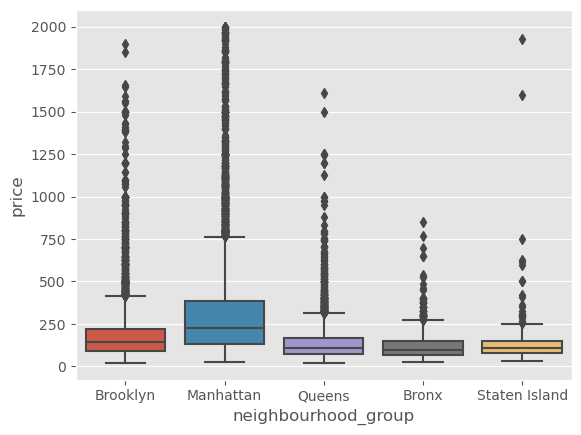

In [29]:
sns.boxplot(x = 'neighbourhood_group', y = 'price', data = df)

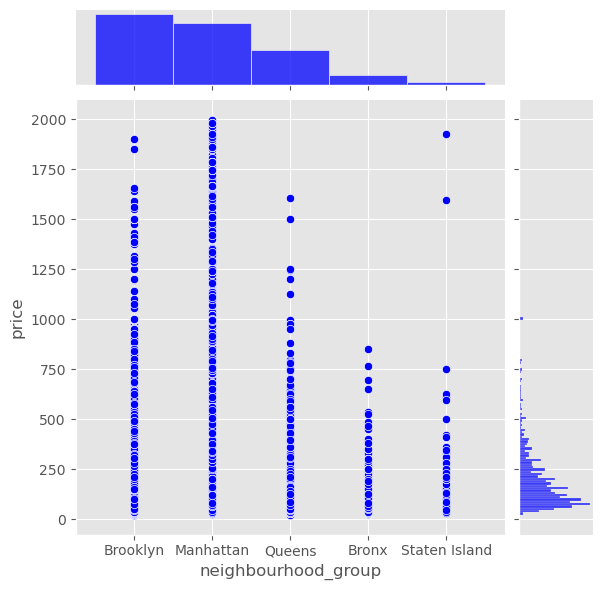

In [30]:
sns.jointplot(x = df['neighbourhood_group'],y = df['price'], color='blue')

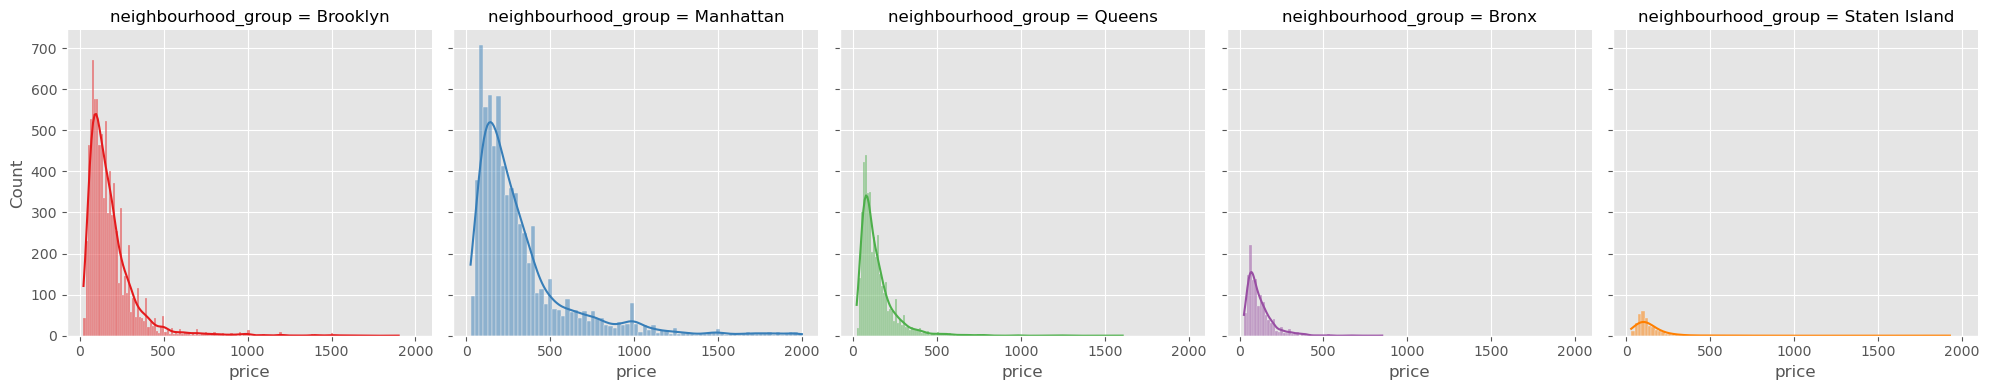

In [31]:
neighbourhood_group_grid = sns.FacetGrid(df, col = 'neighbourhood_group', hue = "neighbourhood_group", palette = "Set1", height = 4)
neighbourhood_group_grid.map(sns.histplot, "price", kde=True)

In [32]:
neighborhood_groups = df.groupby('neighbourhood_group')
grouped_by_neighborhood = neighborhood_groups[['price','pps', 'annual_revenue']].mean()
grouped_by_neighborhood=grouped_by_neighborhood.reset_index()
grouped_by_neighborhood=grouped_by_neighborhood.sort_values(by='price',ascending=False)
grouped_by_neighborhood

,neighbourhood_group,price,pps,annual_revenue
2,Manhattan,328.861275,1020.550750,61038.449250
1,Brooklyn,183.323660,650.804821,35946.325649
4,Staten Island,144.540453,440.391586,22492.967638
3,Queens,143.576988,378.135122,20290.754411
0,Bronx,118.783740,301.779675,14987.882114


Text(0.5, 1.0, 'Barplot of Average Price of each Borough')

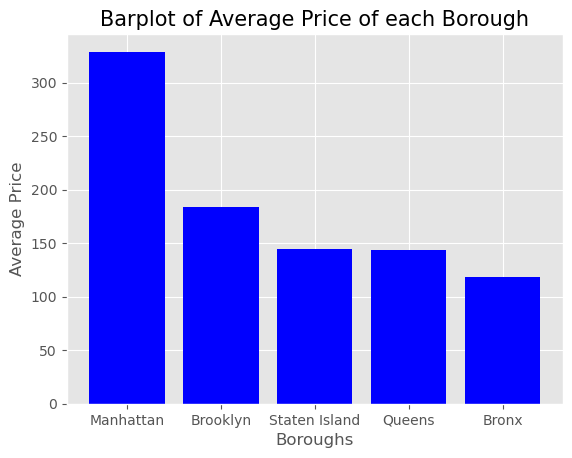

In [33]:
plt.bar(grouped_by_neighborhood['neighbourhood_group'], grouped_by_neighborhood['price'],color='blue')
plt.xlabel('Boroughs')
plt.ylabel('Average Price')
plt.title('Barplot of Average Price of each Borough', fontsize = 15)

Text(0.5, 1.0, 'Barplot of Average Annual Revenue of each Borough')

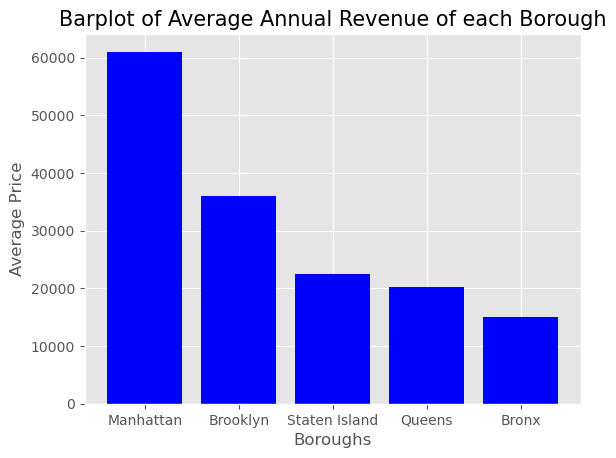

In [34]:
plt.bar(grouped_by_neighborhood['neighbourhood_group'], grouped_by_neighborhood['annual_revenue'],color='blue')
plt.xlabel('Boroughs')
plt.ylabel('Average Price')
plt.title('Barplot of Average Annual Revenue of each Borough', fontsize = 15)

In [35]:
brooklyn = df[df['neighbourhood_group']=='Brooklyn']
manhattan = df[df['neighbourhood_group']=='Manhattan']
queens = df[df['neighbourhood_group']=='Queens']
bronx = df[df['neighbourhood_group']=='Bronx']
staten_island = df[df['neighbourhood_group']=='Staten Island']

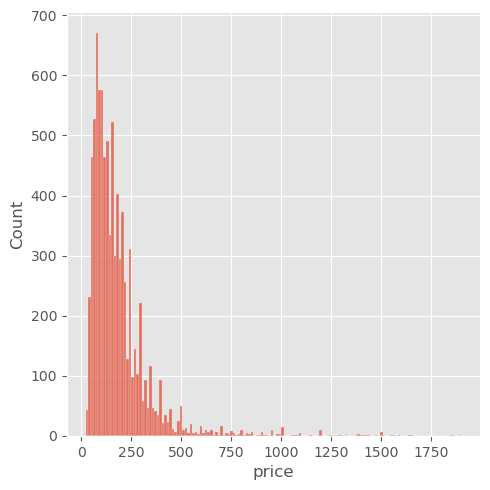

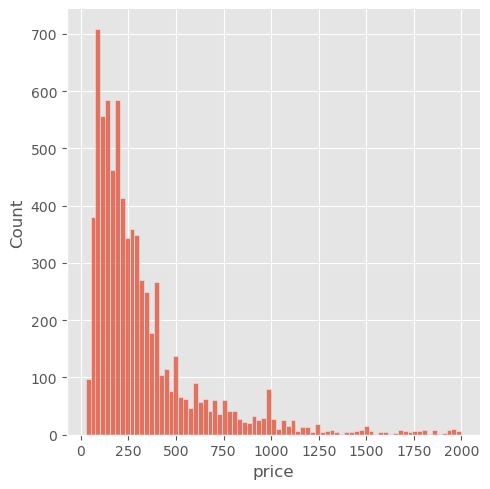

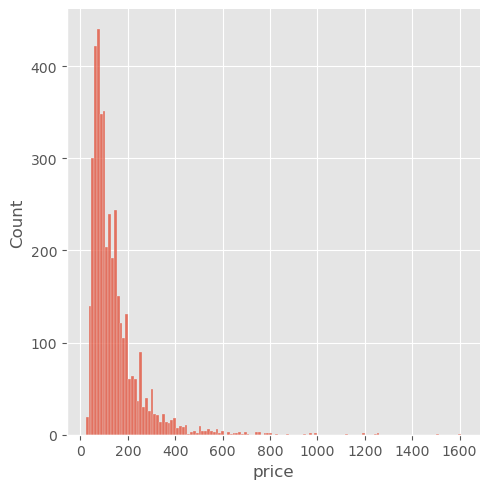

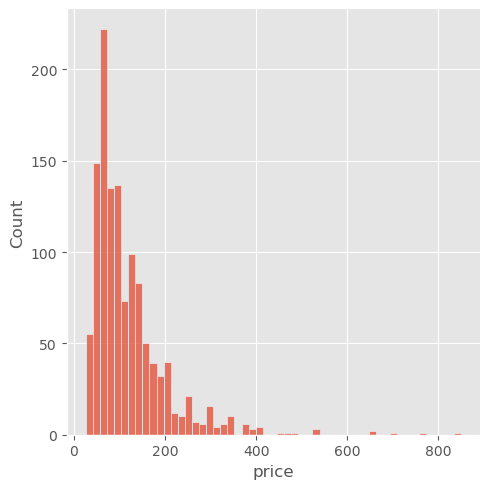

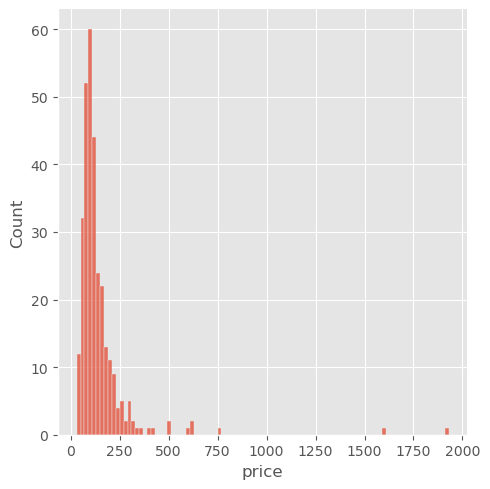

In [47]:
sns.displot(brooklyn['price'])
sns.displot(manhattan['price'])
sns.displot(queens['price'])
sns.displot(bronx['price'])
sns.displot(staten_island['price'])

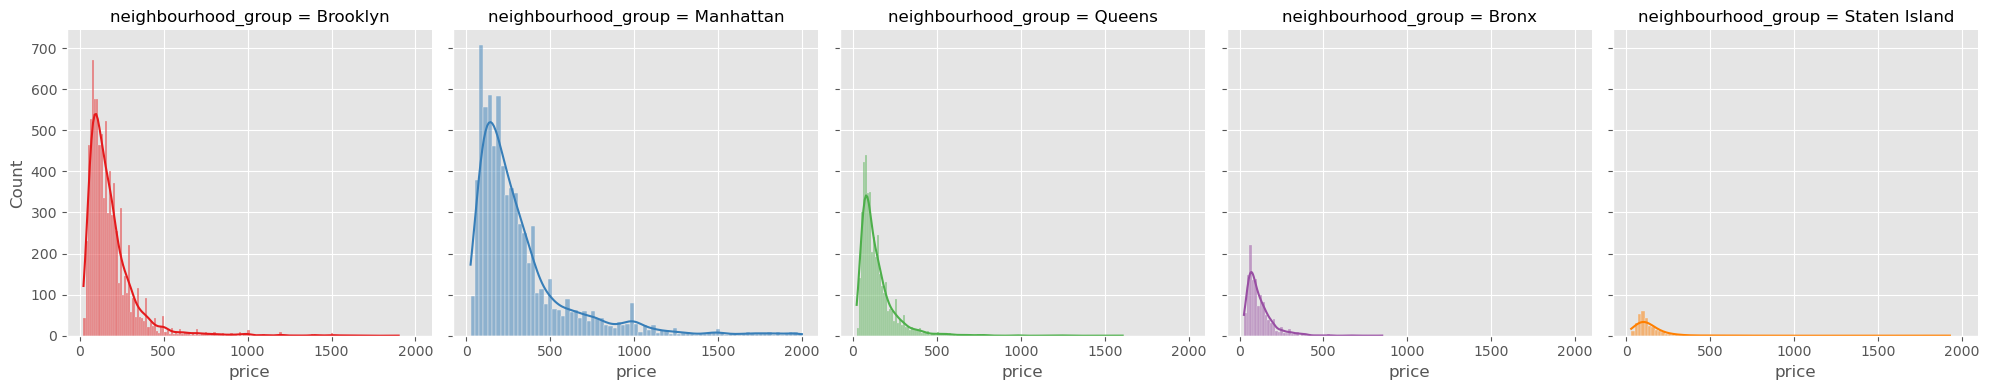

In [49]:
neighbourhood_group_grid = sns.FacetGrid(df, col = 'neighbourhood_group', hue = "neighbourhood_group", palette = "Set1", height = 4)
neighbourhood_group_grid.map(sns.histplot, "price", kde=True)